In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset_traffic_accident_prediction1.csv")
df.head()

Saving dataset_traffic_accident_prediction1.csv to dataset_traffic_accident_prediction1.csv


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [ ]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


Processing missing value

In [ ]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


Traffic_Density - mean: 1.0012531328320802, Меdian: 1.0


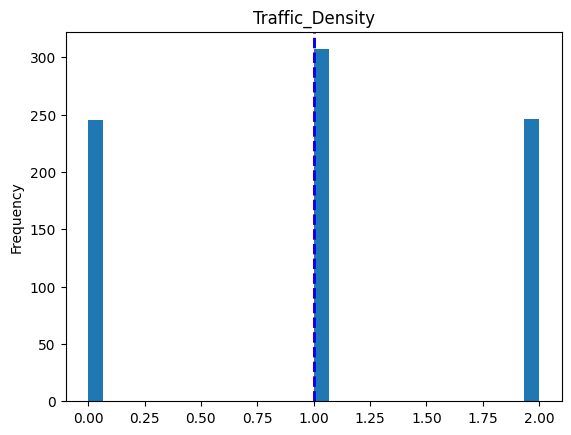

Speed_Limit - mean: 71.0501253132832, Меdian: 60.0


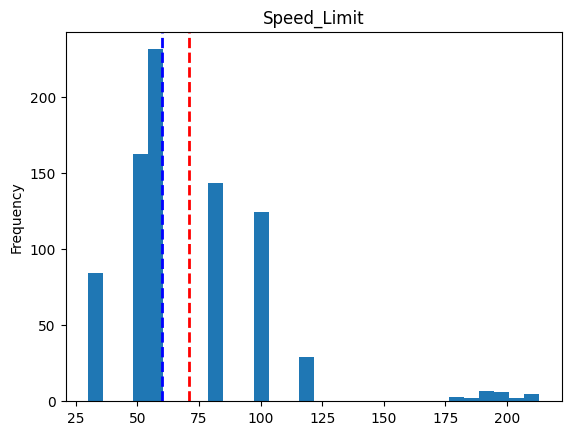

Number_of_Vehicles - mean: 3.2869674185463658, Меdian: 3.0


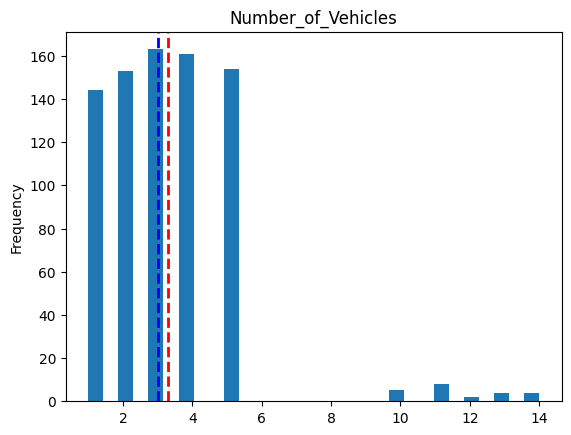

Driver_Alcohol - mean: 0.16040100250626566, Меdian: 0.0


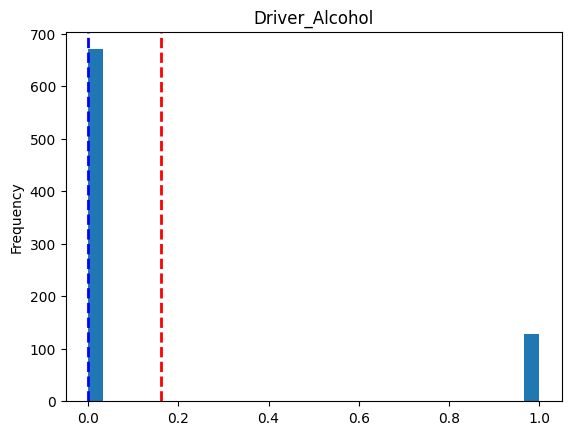

Driver_Age - mean: 43.2593984962406, Меdian: 43.0


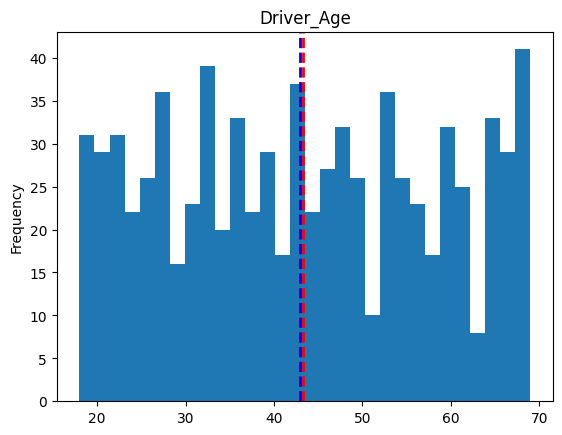

Driver_Experience - mean: 38.9812030075188, Меdian: 39.0


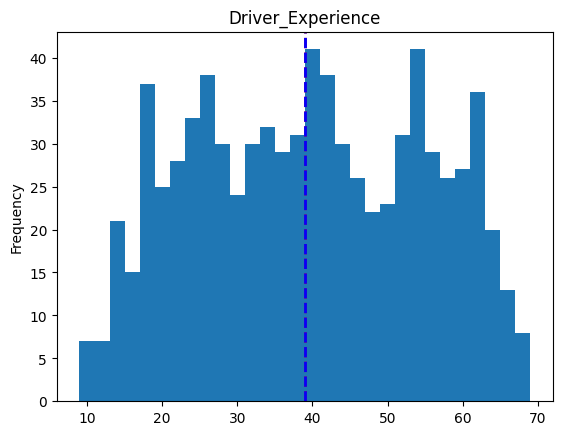

Accident - mean: 0.29949874686716793, Меdian: 0.0


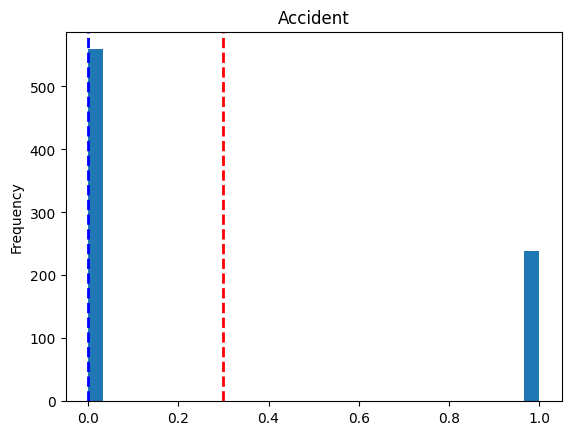

In [ ]:
columns_with_missing = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol',
                       'Driver_Age', 'Driver_Experience',
                       'Accident']

for i in columns_with_missing:
    print(f"{i} - mean: {df[i].mean()}, Меdian: {df[i].median()}")
    df[i].plot(kind='hist', bins=30, title=i)
    plt.axvline(df[i].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(df[i].median(), color='blue', linestyle='dashed', linewidth=2)
    plt.show()

In [ ]:
df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)
df['Speed_Limit'].fillna(df['Speed_Limit'].median(), inplace=True)
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(), inplace=True)
df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].median(), inplace=True)
df['Driver_Age'].fillna(df['Driver_Age'].median(), inplace=True)
df['Driver_Experience'].fillna(df['Driver_Experience'].median(), inplace=True)
df['Accident'].fillna(df['Accident'].median(), inplace=True)

In [ ]:
columns_miss = df.columns[df.isnull().sum() > 0]

df[columns_miss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Weather               798 non-null    object
 1   Road_Type             798 non-null    object
 2   Time_of_Day           798 non-null    object
 3   Accident_Severity     798 non-null    object
 4   Road_Condition        798 non-null    object
 5   Vehicle_Type          798 non-null    object
 6   Road_Light_Condition  798 non-null    object
dtypes: object(7)
memory usage: 46.1+ KB


In [ ]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])
df['Road_Condition'] = df['Road_Condition'].fillna(df['Road_Condition'].mode()[0])
df['Vehicle_Type'] = df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0])
df['Road_Light_Condition'] = df['Road_Light_Condition'].fillna(df['Road_Light_Condition'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


Checking for emissions

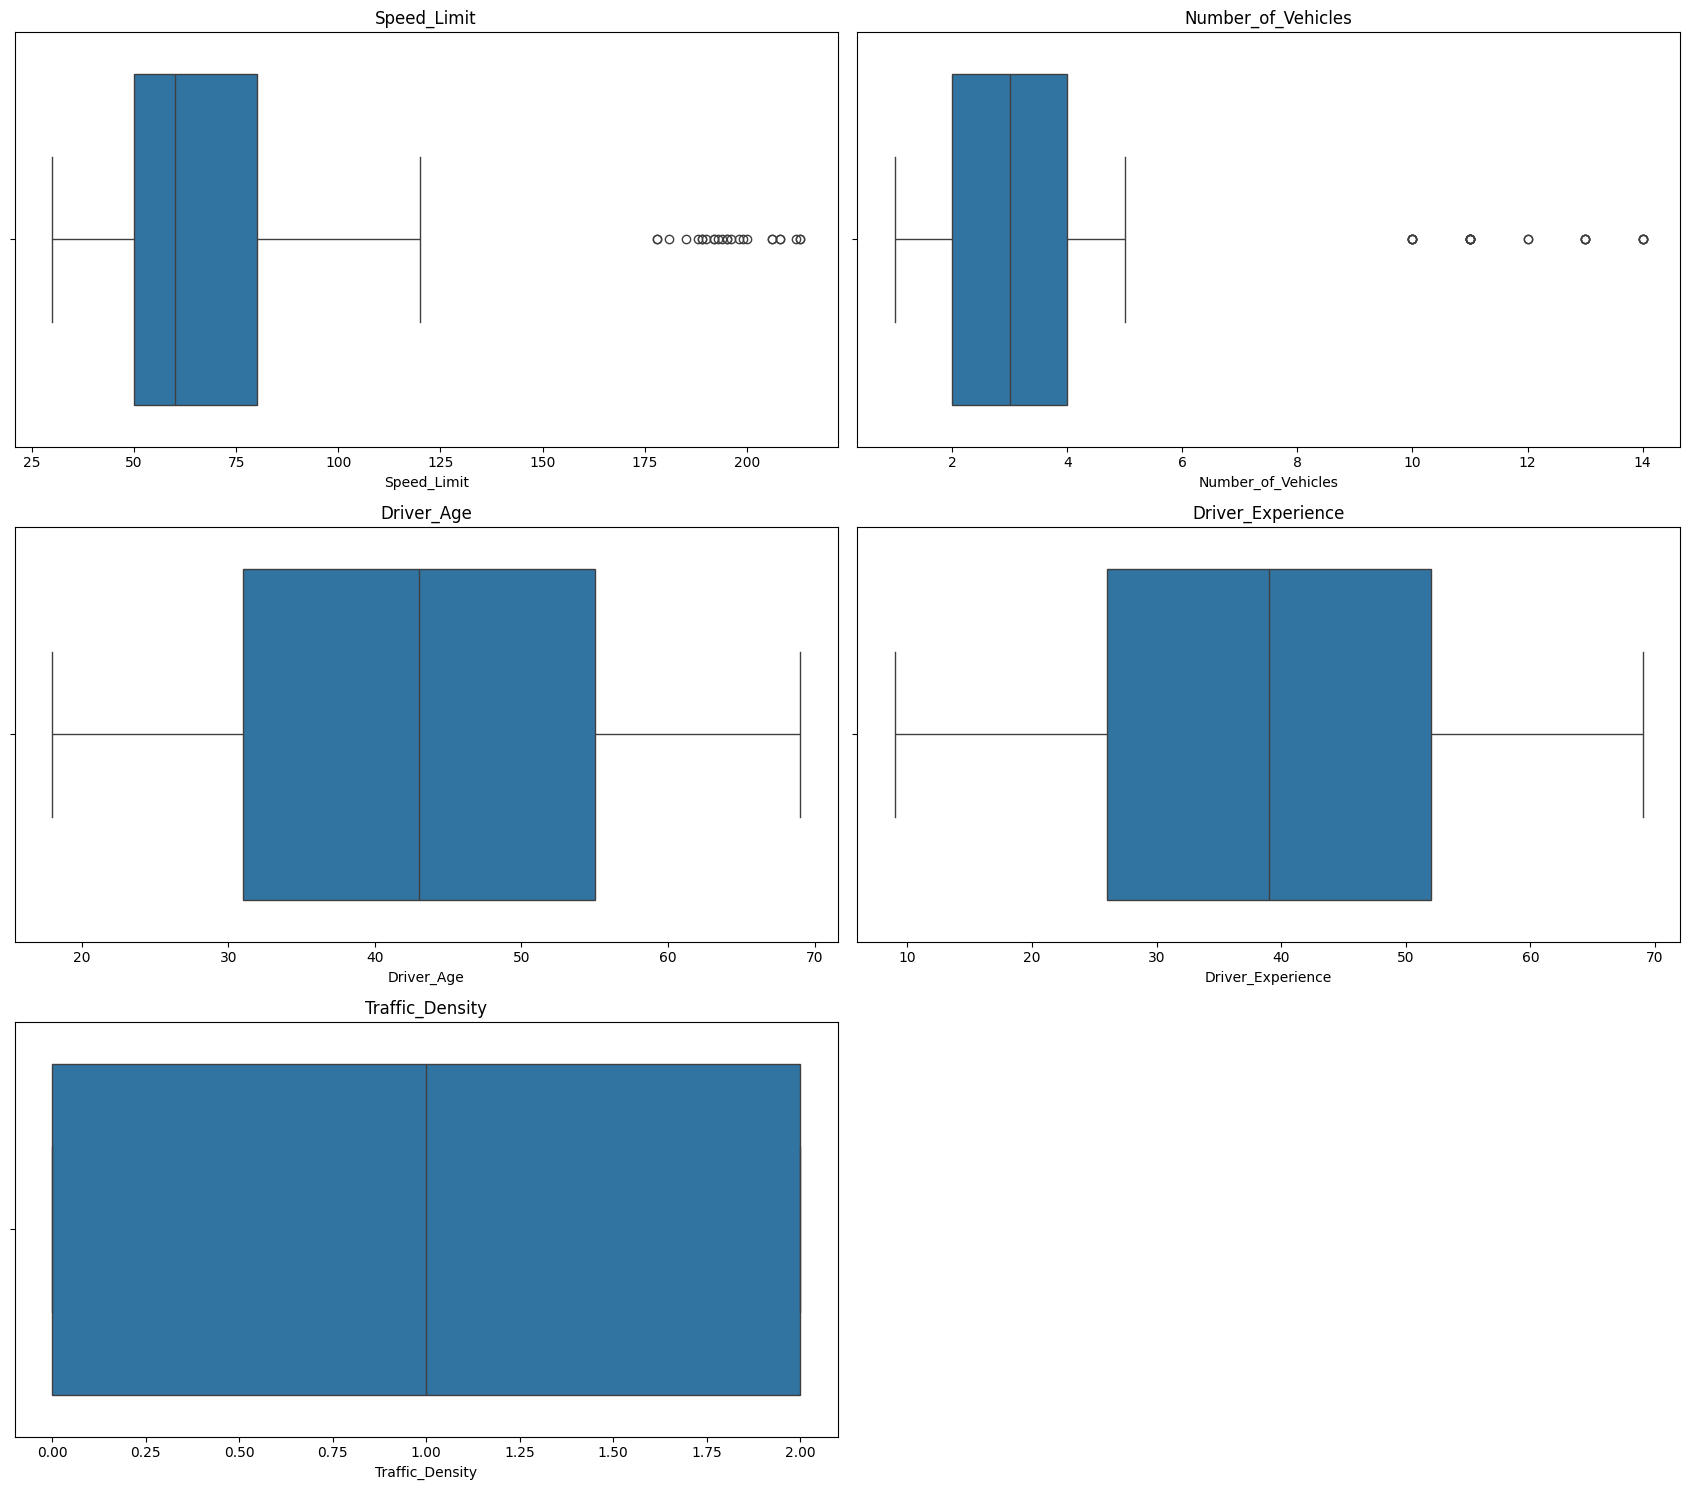

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(17, 15))

sns.boxplot(x=df['Speed_Limit'], ax=axes[0, 0])
axes[0, 0].set_title('Speed_Limit')

sns.boxplot(x=df['Number_of_Vehicles'], ax=axes[0, 1])
axes[0, 1].set_title('Number_of_Vehicles')

sns.boxplot(x=df['Driver_Age'], ax=axes[1, 0])
axes[1, 0].set_title('Driver_Age')

sns.boxplot(x=df['Driver_Experience'], ax=axes[1, 1])
axes[1, 1].set_title('Driver_Experience')

sns.boxplot(x=df['Traffic_Density'], ax=axes[2, 0])
axes[2, 0].set_title('Traffic_Density')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

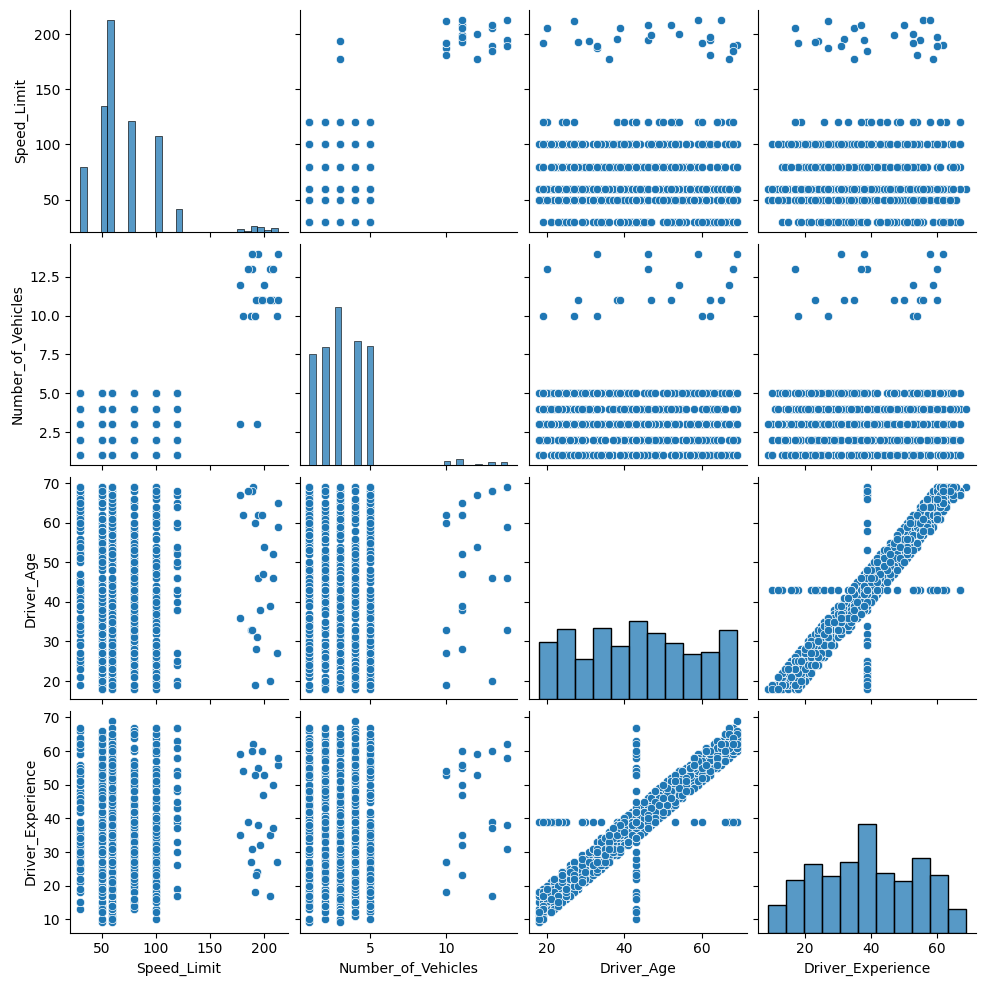

In [ ]:
cols = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Spearman correlation

                    Traffic_Density  Speed_Limit  Number_of_Vehicles  \
Traffic_Density            1.000000    -0.041350           -0.036707   
Speed_Limit               -0.041350     1.000000            0.075663   
Number_of_Vehicles        -0.036707     0.075663            1.000000   
Driver_Alcohol            -0.022316    -0.037316           -0.030752   
Driver_Age                -0.003614    -0.041712           -0.022445   
Driver_Experience         -0.000176    -0.039790           -0.013628   
Accident                   0.005915    -0.033001            0.041215   

                    Driver_Alcohol  Driver_Age  Driver_Experience  Accident  
Traffic_Density          -0.022316   -0.003614          -0.000176  0.005915  
Speed_Limit              -0.037316   -0.041712          -0.039790 -0.033001  
Number_of_Vehicles       -0.030752   -0.022445          -0.013628  0.041215  
Driver_Alcohol            1.000000    0.021462           0.023368  0.011607  
Driver_Age                0.02146

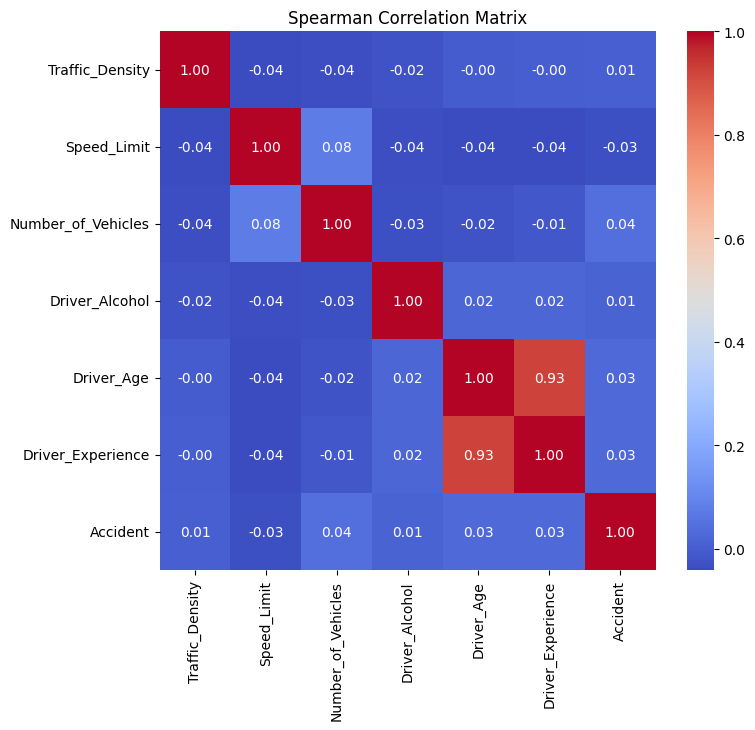

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')
print(spearman_corr)
plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
                                  'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first=True)

In [ ]:
df['Age_vs_Experience'] = df['Driver_Age'] - df['Driver_Experience']
df = df.drop(['Driver_Age', 'Driver_Experience'], axis = 1)

Machine Learning

Preparing data


In [ ]:
X = df.drop(['Accident'], axis = 1)
y = df['Accident']

In [ ]:
feature_names = X.columns

RobastScaler

In [ ]:
numeric_columns = ['Speed_Limit', 'Number_of_Vehicles', 'Age_vs_Experience']

scaler = RobustScaler()

X_scaled = X.copy()
X_scaled[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=100)

XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss')

param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}


grid_search__xgb = GridSearchCV(xgb_classifier, param_xgb, cv=5)

grid_search__xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [ ]:
grid_search__xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 50,
 'subsample': 1.0}

In [ ]:
best_gs_xgb = grid_search__xgb.best_estimator_

In [ ]:
print('Score on train data = ', round(best_gs_xgb.score(X_train, y_train), 4))
print('Score on test data = ', round(best_gs_xgb.score(X_test, y_test), 4))

Score on train data =  0.7331
Score on test data =  0.6906
